In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
plt.style.use('ggplot')
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import statsmodels.api as sm
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, make_scorer
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('data/8countries/top200_processed2.csv')
df.head()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,rank,date,region,trend,streams,year,month,top200_count,trend_rank_score,stream_bins
0,0,0,0.733,0.818,10,-7.222,0,0.0859,0.0241,0.0000,...,194,2017-01-01,France,MOVE_DOWN,14587.0,2017,1,1,-0.035,1.0
1,6,57,0.773,0.849,8,-8.345,0,0.0587,0.0570,0.0103,...,184,2017-01-01,France,MOVE_UP,15033.0,2017,1,1,0.085,1.0
2,7,64,0.654,0.796,2,-4.761,0,0.1220,0.0188,0.0000,...,190,2017-01-01,France,MOVE_DOWN,14886.0,2017,1,1,-0.055,1.0
3,11,26,0.660,0.598,11,-9.707,0,0.0491,0.0420,0.0444,...,126,2017-01-01,France,MOVE_DOWN,19789.0,2017,1,1,-0.375,1.0
4,14,0,0.754,0.731,9,-7.480,0,0.0316,0.2010,0.0000,...,148,2017-01-01,France,MOVE_UP,17573.0,2017,1,1,0.265,1.0


In [6]:
df.columns

Index(['Unnamed: 0', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'title', 'rank',
       'date', 'region', 'trend', 'streams', 'year', 'month', 'top200_count',
       'trend_rank_score', 'stream_bins'],
      dtype='object')

In [ ]:
df=df.drop(['Unnamed: 0','time_signature','title','trend','date','streams'],axis=1)

In [10]:
df.head(5)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,duration_ms,rank,region,streams,year,month,top200_count,trend_rank_score,stream_bins
0,0,0.733,0.818,10,-7.222,0,0.0859,0.0241,0.0000,0.0636,...,116.019,3.869117,194,France,14587.0,2017,1,1,-0.035,1.0
1,57,0.773,0.849,8,-8.345,0,0.0587,0.0570,0.0103,0.3970,...,119.981,3.203783,184,France,15033.0,2017,1,1,0.085,1.0
2,64,0.654,0.796,2,-4.761,0,0.1220,0.0188,0.0000,0.0948,...,108.854,2.976383,190,France,14886.0,2017,1,1,-0.055,1.0
3,26,0.660,0.598,11,-9.707,0,0.0491,0.0420,0.0444,0.1160,...,120.003,3.233333,126,France,19789.0,2017,1,1,-0.375,1.0
4,0,0.754,0.731,9,-7.480,0,0.0316,0.2010,0.0000,0.0563,...,131.407,4.065033,148,France,17573.0,2017,1,1,0.265,1.0


In [23]:
#encoding region and years
regions=list(df['region'].unique())
years=list(df['year'].unique())
df['enc_region']=df['region'].apply(lambda x:regions.index(x))
df['enc_year']=df['year'].apply(lambda x:years.index(x))


In [25]:
df=df.drop(['region','year'],axis=1)

In [35]:
df[df.isna().any(axis=1)]

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,duration_ms,rank,streams,month,top200_count,trend_rank_score,stream_bins,enc_region,enc_year
49,73,0.573,0.6300,1,-8.389,1,0.1050,0.18900,0.000023,0.2590,...,77.525,4.153550,196,13478.0,1,2,0.040,NaN,0,0
7056,73,0.589,0.2270,2,-16.670,1,0.0498,0.64000,0.004690,0.0248,...,74.993,4.680883,196,13859.0,1,2,0.035,NaN,1,0
13190,66,0.532,0.8680,3,-4.230,0,0.0908,0.01100,0.000000,0.0584,...,110.127,3.132633,191,26117.0,1,1,-0.050,NaN,2,0
20007,0,0.697,0.0543,7,-22.353,1,0.0543,0.94900,0.010800,0.0522,...,113.107,3.833550,190,12483.0,1,1,0.055,NaN,3,0
27550,73,0.757,0.6780,8,-5.529,0,0.2330,0.04720,0.000009,0.0654,...,120.075,3.637250,197,5351.0,1,1,-0.020,NaN,4,0
33408,8,0.719,0.5570,2,-6.187,0,0.0355,0.00806,0.008770,0.0965,...,121.997,4.394250,200,5677.0,1,1,-0.005,NaN,5,0
39189,0,0.556,0.8240,11,-6.354,1,0.0373,0.11900,0.000006,0.1240,...,106.034,4.111400,192,2106.0,1,1,0.045,NaN,6,0
44775,0,0.611,0.7000,9,-5.331,1,0.0436,0.01990,0.000000,0.0549,...,104.981,3.676217,198,2019.0,1,6,0.085,NaN,7,0


In [36]:
df.dropna(inplace=True)

In [48]:
y = df['stream_bins']
X = df.drop('stream_bins', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [49]:
#Decision tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)
# Make predictions using test set 
y_pred = dt.predict(X_test)
# Check the AUC of predictions
print(metrics.confusion_matrix(y_test, y_pred))

[[2081  411  104   22]
 [ 383 1400  648  114]
 [ 115  648 1241  520]
 [  22  120  454 1938]]


In [50]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.80      0.79      0.80      2618
         2.0       0.54      0.55      0.55      2545
         3.0       0.51      0.49      0.50      2524
         4.0       0.75      0.76      0.76      2534

    accuracy                           0.65     10221
   macro avg       0.65      0.65      0.65     10221
weighted avg       0.65      0.65      0.65     10221



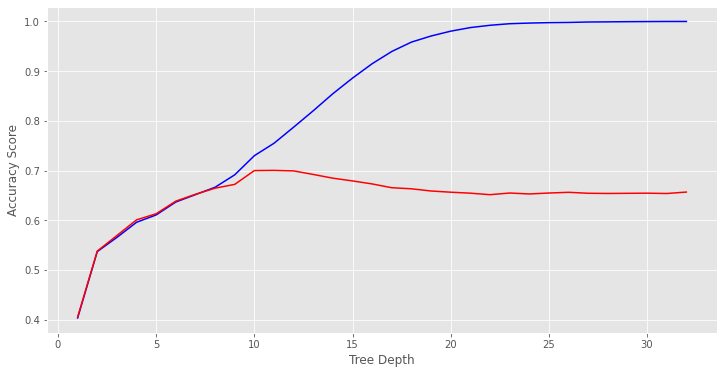

In [51]:
max_depths = np.linspace(1,32,32,endpoint=True)
# As review, linspace returns evenly spaced numbers over a specified interval.
train_results=[]
test_results=[]
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    #false_positive_rate, true_positive_rate, thresholds = metrics.auc(y_train, train_pred)
    auc = metrics.accuracy_score(y_train, train_pred)
    # add auc score to the previous train results
    train_results.append(auc)
    y_pred = dt.predict(X_test)
    #false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, y_pred)
    auc = metrics.accuracy_score(y_test, y_pred)
    # add score to previous test results
    test_results.append(auc)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('Accuracy Score')
plt.xlabel('Tree Depth')
plt.legend
plt.show()

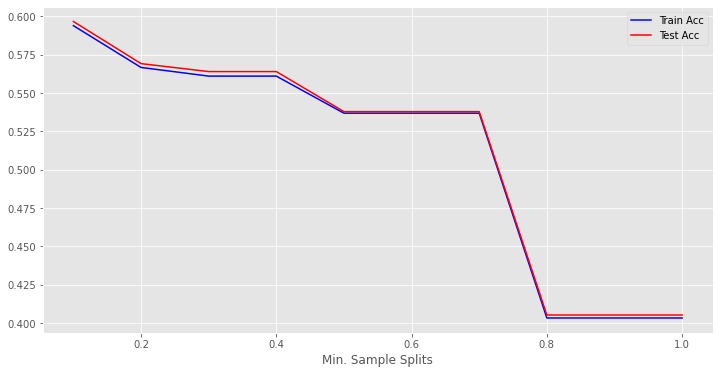

In [52]:
min_samples_splits = np.linspace(0.1,1.0,10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier (criterion = 'entropy', min_samples_split = min_samples_split, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    acc = metrics.accuracy_score(y_train, train_pred)
    train_results.append(acc)
    y_pred = dt.predict(X_test)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    test_results.append(acc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label = 'Train Acc')
plt.plot(min_samples_splits, test_results, 'r',label = 'Test Acc')
plt.xlabel('Min. Sample Splits')
plt.legend()
plt.show()

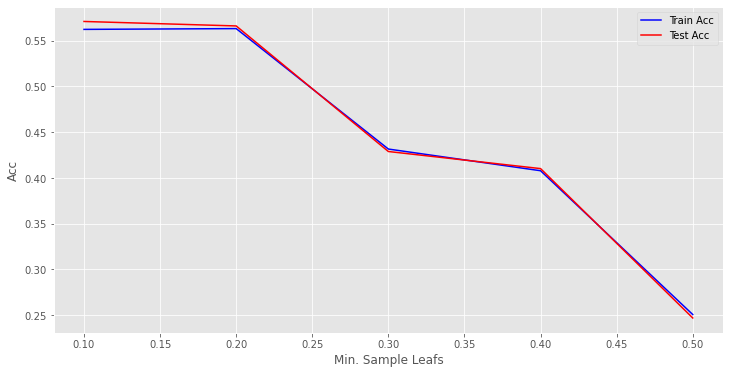

In [53]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs=np.linspace(0.1,0.5,5, endpoint = True)
train_results=[]
test_results=[]
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = min_samples_leaf, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    acc = metrics.accuracy_score(y_train, train_pred)
    train_results.append(acc)
    y_pred = dt.predict(X_test)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve (y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    test_results.append(acc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train Acc')
plt.plot(min_samples_leafs, test_results, 'r', label='Test Acc')
plt.ylabel('Acc')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

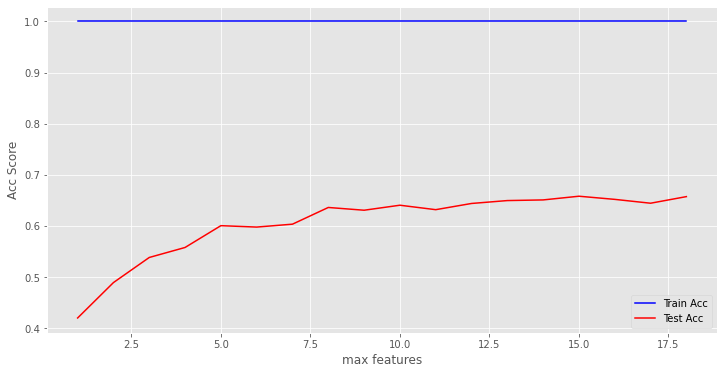

In [54]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion = 'entropy', max_features = max_feature, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    acc = metrics.accuracy_score(y_train, train_pred)
    train_results.append(acc)
    y_pred = dt.predict(X_test)
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    test_results.append(acc)
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label = 'Train Acc')
plt.plot(max_features, test_results, 'r', label = 'Test Acc')
plt.ylabel('Acc Score')
plt.xlabel('max features')
plt.legend()
plt.show()

In [60]:
dt2 = DecisionTreeClassifier(criterion='entropy',
                           max_features=15,
                           max_depth = 8,
                           min_samples_split = 0.1,
                           min_samples_leaf = 0.1,
                           random_state = 42)

dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=15,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       random_state=42)

In [61]:
y_pred = dt2.predict(X_test)
# Calculate accuracy 
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy is: {0}'.format(acc))
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test,y_pred,rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is: 57.10791507680266

Confusion Matrix
----------------


Predicted,1.0,2.0,3.0,4.0,All
True,,,,,
1.0,1948,275,193,202,2618
2.0,689,884,728,244,2545
3.0,250,545,1279,450,2524
4.0,77,104,627,1726,2534
All,2964,1808,2827,2622,10221


In [57]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1948  275  193  202]
 [ 689  884  728  244]
 [ 250  545 1279  450]
 [  77  104  627 1726]]
              precision    recall  f1-score   support

         1.0       0.66      0.74      0.70      2618
         2.0       0.49      0.35      0.41      2545
         3.0       0.45      0.51      0.48      2524
         4.0       0.66      0.68      0.67      2534

    accuracy                           0.57     10221
   macro avg       0.56      0.57      0.56     10221
weighted avg       0.57      0.57      0.56     10221



In [62]:
import graphviz
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


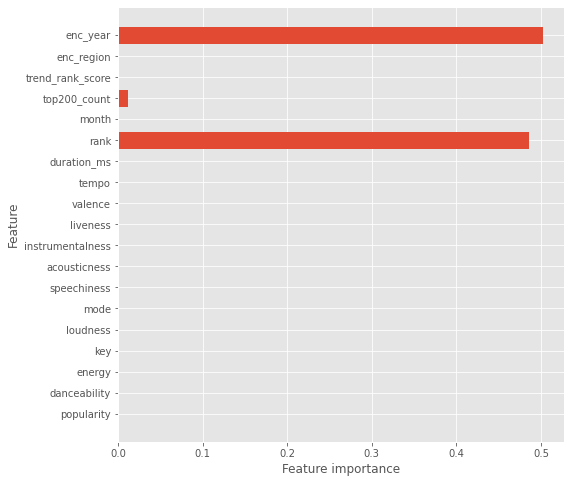

In [63]:
plot_feature_importances(dt2)

In [64]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,rank,month,top200_count,trend_rank_score,enc_region,enc_year
0,0.567170,-1.572932,0.971917,-0.895538,0.157927,0.904315,1.334018,-0.821226,-0.169823,3.857944,-0.375389,-1.313070,1.743655,-0.678233,-0.759902,-0.451022,-0.024153,-1.039244,-0.083086
1,0.797992,0.132577,-0.605683,0.202815,-2.775103,0.904315,-0.647096,0.312693,-0.169035,-0.597606,1.867030,-0.789825,-0.628652,0.554202,-1.633173,-0.459501,-0.026412,-0.602186,-1.498972
2,-1.856461,-0.462997,-1.476285,-0.620950,-2.224854,0.904315,-0.708759,2.845408,-0.169541,-0.034592,1.420369,0.809477,0.058355,-1.767361,1.568820,-0.417107,0.245502,-1.039244,-0.791029
3,0.797992,-3.217531,-1.990466,-0.620950,-1.353940,0.904315,-0.822598,1.993167,-0.169522,-0.670449,-1.674351,-1.052989,1.420636,0.840814,1.568820,-0.459501,-0.033944,1.146044,0.624858
4,0.836462,-0.442694,0.691455,-1.444715,-1.478894,0.904315,-0.810740,-0.970477,8.575977,-0.850279,-0.461986,0.598300,0.815865,-1.194135,-0.468812,-0.459501,0.019535,-0.602186,-1.498972


In [65]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [66]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

[[1809  542  227   40]
 [ 696 1118  600  131]
 [ 405  868  937  314]
 [ 116  392  619 1407]]
              precision    recall  f1-score   support

         1.0       0.60      0.69      0.64      2618
         2.0       0.38      0.44      0.41      2545
         3.0       0.39      0.37      0.38      2524
         4.0       0.74      0.56      0.64      2534

    accuracy                           0.52     10221
   macro avg       0.53      0.51      0.52     10221
weighted avg       0.53      0.52      0.52     10221



In [68]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=34):
    best_k = 0
    best_score = 0.0
    for k in range (min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score (y_test, preds, average='micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    print ("Best value for k: {}".format(best_k))
    print ("F1-Score: {}".format(best_score))

In [69]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best value for k: 33
F1-Score: 0.5702964484884062


In [70]:
# Instantiate KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=33)

# Fit the classifier
clf2.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf2.predict(scaled_data_test)

In [71]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

[[1912  400  267   39]
 [ 586 1078  762  119]
 [ 274  675 1256  319]
 [  85  262  604 1583]]
              precision    recall  f1-score   support

         1.0       0.67      0.73      0.70      2618
         2.0       0.45      0.42      0.43      2545
         3.0       0.43      0.50      0.46      2524
         4.0       0.77      0.62      0.69      2534

    accuracy                           0.57     10221
   macro avg       0.58      0.57      0.57     10221
weighted avg       0.58      0.57      0.57     10221



In [72]:
#Random forest
# Instantiate a BaggingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20)

In [73]:
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20)

In [74]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.6210312607015313

In [75]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.6203893943841111

In [76]:
# Test set predictions
pred = bagged_tree.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1949  531   96   42]
 [ 396 1627  394  128]
 [ 145 1063  847  469]
 [  34  252  330 1918]]
              precision    recall  f1-score   support

         1.0       0.77      0.74      0.76      2618
         2.0       0.47      0.64      0.54      2545
         3.0       0.51      0.34      0.40      2524
         4.0       0.75      0.76      0.75      2534

    accuracy                           0.62     10221
   macro avg       0.62      0.62      0.61     10221
weighted avg       0.63      0.62      0.62     10221



In [77]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=6)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [78]:
# Training accuracy score
forest.score(X_train, y_train)

0.6224499779854215

In [79]:
# Test accuracy score
forest.score(X_test, y_test)

0.6226396634380198

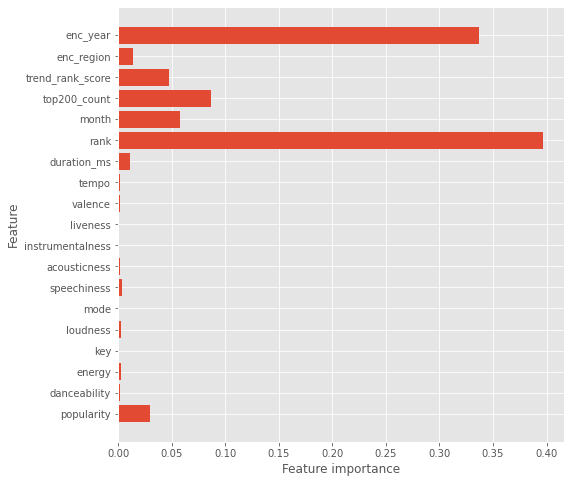

In [80]:
plot_feature_importances(forest)

In [81]:
# Test set predictions for forest:
pred = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2076  351  114   77]
 [ 723 1142  497  183]
 [ 253  593 1219  459]
 [  51  100  456 1927]]
              precision    recall  f1-score   support

         1.0       0.67      0.79      0.73      2618
         2.0       0.52      0.45      0.48      2545
         3.0       0.53      0.48      0.51      2524
         4.0       0.73      0.76      0.74      2534

    accuracy                           0.62     10221
   macro avg       0.61      0.62      0.61     10221
weighted avg       0.61      0.62      0.62     10221



In [82]:
#GridSearch random forest
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Val Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Val Score for Random Forest Classifier: 67.70%


In [83]:
rf_param_grid = {
    'n_estimators' : [10,30,100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2,6,10],
    'min_samples_split' : [5,10],
    'min_samples_leaf' : [3,6]
    
}

In [84]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)


print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 68.59%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [85]:
forest2 = RandomForestClassifier(n_estimators=100, max_depth=None, 
                                criterion = 'entropy', min_samples_leaf=3,
                                min_samples_split=5)
forest2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=5)

In [86]:
# Training accuracy score
forest2.score(X_train, y_train)

0.9810674624529132

In [87]:
# Test accuracy score
forest2.score(X_test, y_test)

0.6976812444966246

In [88]:
# Test set predictions for final forest:
pred = forest2.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2169  349   74   26]
 [ 400 1525  520  100]
 [ 145  551 1444  384]
 [  21   63  457 1993]]
              precision    recall  f1-score   support

         1.0       0.79      0.83      0.81      2618
         2.0       0.61      0.60      0.61      2545
         3.0       0.58      0.57      0.58      2524
         4.0       0.80      0.79      0.79      2534

    accuracy                           0.70     10221
   macro avg       0.70      0.70      0.70     10221
weighted avg       0.70      0.70      0.70     10221



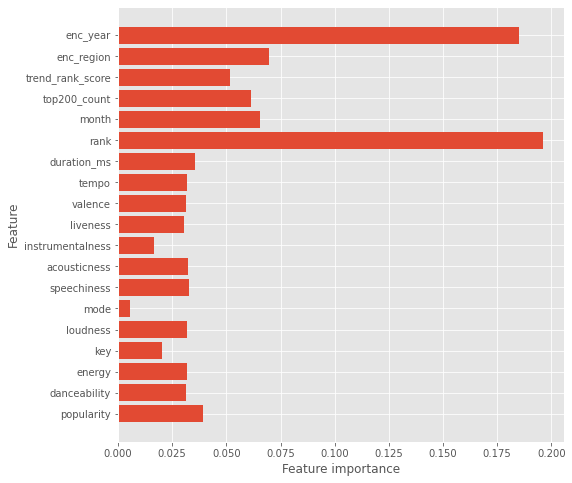

In [89]:
plot_feature_importances(forest2)

In [90]:
#using the more importantfeatures - remove mode, key, instrumentalness
X = df[['enc_year','enc_region','trend_rank_score','top200_count','month','rank','popularity', 'duration_ms','valence',
        'danceability','tempo', 'liveness', 'acousticness', 'speechiness','loudness','energy']]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [92]:
#untuned decision tree
dt4 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [93]:
# Make predictions using test set 
y_pred = dt4.predict(X_test)

# Check the AUC of predictions
print(metrics.accuracy_score(y_test, y_pred))

0.6565893748165541


In [94]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2085  395  120   18]
 [ 381 1396  642  126]
 [ 123  610 1298  493]
 [  16  100  486 1932]]
              precision    recall  f1-score   support

         1.0       0.80      0.80      0.80      2618
         2.0       0.56      0.55      0.55      2545
         3.0       0.51      0.51      0.51      2524
         4.0       0.75      0.76      0.76      2534

    accuracy                           0.66     10221
   macro avg       0.66      0.66      0.66     10221
weighted avg       0.66      0.66      0.66     10221



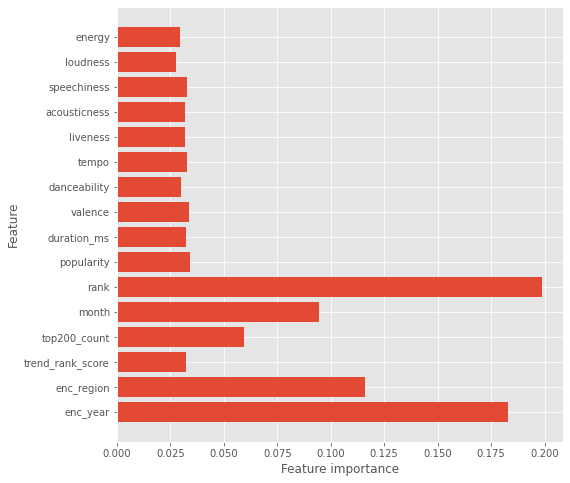

In [95]:
plot_feature_importances(dt4)

In [96]:
# Instantiate a BaggingClassifier
bagged_tree2 = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20)

In [97]:
# Fit to the training data
bagged_tree2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20)

In [98]:
# Training accuracy score
bagged_tree2.score(X_train, y_train)

0.6201995988454576

In [99]:
# Test accuracy score
bagged_tree2.score(X_test, y_test)

0.621074258878779

In [100]:
# Test set predictions
pred = bagged_tree2.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1937  543   94   44]
 [ 367 1659  383  136]
 [ 141 1082  804  497]
 [  34  249  303 1948]]
              precision    recall  f1-score   support

         1.0       0.78      0.74      0.76      2618
         2.0       0.47      0.65      0.55      2545
         3.0       0.51      0.32      0.39      2524
         4.0       0.74      0.77      0.76      2534

    accuracy                           0.62     10221
   macro avg       0.63      0.62      0.61     10221
weighted avg       0.63      0.62      0.61     10221



In [101]:
#untuned random forest
# Instantiate and fit an Untuned RandomForestClassifier
forest3 = RandomForestClassifier(n_estimators=100, max_depth=6)
forest3.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [102]:
forest3.score(X_train, y_train)

0.6301061591898635

In [103]:
forest3.score(X_test, y_test)

0.6307601995890812

In [104]:
# Test set predictions
pred = forest3.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2105  341  128   44]
 [ 684 1210  489  162]
 [ 236  653 1202  433]
 [  42  118  444 1930]]
              precision    recall  f1-score   support

         1.0       0.69      0.80      0.74      2618
         2.0       0.52      0.48      0.50      2545
         3.0       0.53      0.48      0.50      2524
         4.0       0.75      0.76      0.76      2534

    accuracy                           0.63     10221
   macro avg       0.62      0.63      0.62     10221
weighted avg       0.62      0.63      0.63     10221



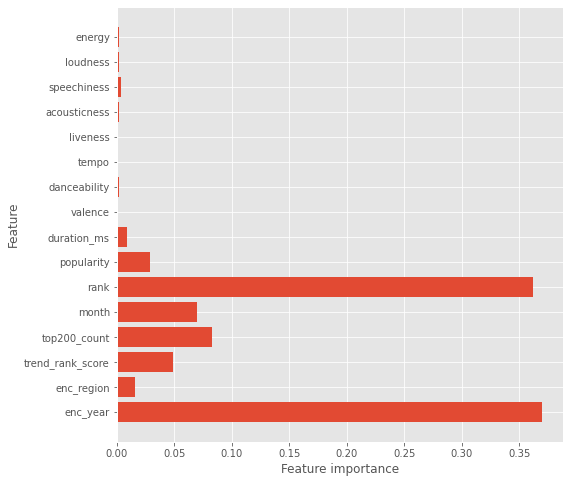

In [105]:
plot_feature_importances(forest3)

In [106]:
dt_clf2 = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf2, X_train, y_train, cv=3) 
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 63.58%


In [107]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [108]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf2, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [109]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 63.98%
Mean Test Score: 67.23%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 5}

In [110]:
tree_clf3 = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf = 6,
                                  min_samples_split = 5)
tree_clf3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=6, min_samples_split=5)

In [111]:
# Test set predictions for tree:
pred = tree_clf3.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2168  353   83   14]
 [ 412 1476  576   81]
 [ 110  672 1330  412]
 [  16   81  533 1904]]
              precision    recall  f1-score   support

         1.0       0.80      0.83      0.81      2618
         2.0       0.57      0.58      0.58      2545
         3.0       0.53      0.53      0.53      2524
         4.0       0.79      0.75      0.77      2534

    accuracy                           0.67     10221
   macro avg       0.67      0.67      0.67     10221
weighted avg       0.67      0.67      0.67     10221



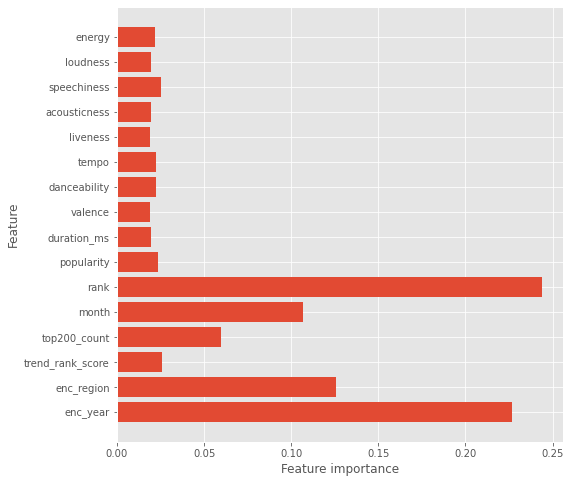

In [112]:
plot_feature_importances(tree_clf3)

In [113]:
forest4 = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(forest4, X_train, y_train, cv=3))

print(f"Mean Cross Val Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Val Score for Random Forest Classifier: 68.70%


In [114]:
rf_param_grid = {
    'n_estimators' : [10,30,100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2,6,10],
    'min_samples_split' : [5,10],
    'min_samples_leaf' : [3,6]
    
}

In [115]:
rf_grid_search = GridSearchCV(forest4, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)


print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 69.47%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [116]:
forest4 = RandomForestClassifier(n_estimators=100, max_depth=None, 
                                criterion = 'entropy', min_samples_leaf=3,
                                min_samples_split=5)
forest4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=5)

In [117]:
# Training accuracy score
forest4.score(X_train, y_train)

0.9806271708820508

In [118]:
# Testing accuracy score
forest4.score(X_test, y_test)

0.7110850210351237

In [119]:
# Test set predictions for final forest:
pred = forest4.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2181  354   62   21]
 [ 370 1600  487   88]
 [ 147  526 1493  358]
 [  19   56  465 1994]]
              precision    recall  f1-score   support

         1.0       0.80      0.83      0.82      2618
         2.0       0.63      0.63      0.63      2545
         3.0       0.60      0.59      0.59      2524
         4.0       0.81      0.79      0.80      2534

    accuracy                           0.71     10221
   macro avg       0.71      0.71      0.71     10221
weighted avg       0.71      0.71      0.71     10221



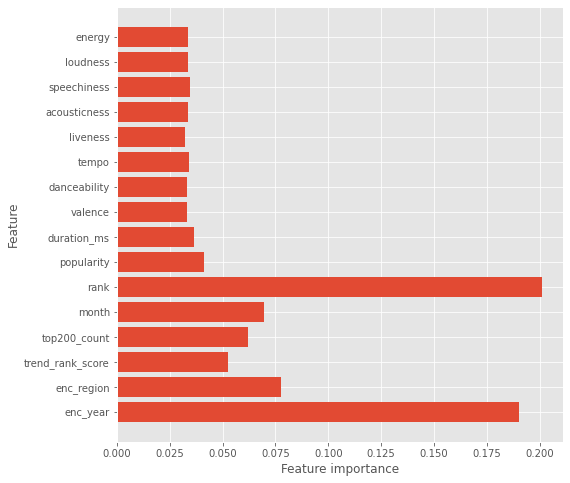

In [120]:
plot_feature_importances(forest4)

In [121]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [125]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)
params = {
    'max_depth': 6,
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 4,
    # Set number of GPUs if available   
    'n_gpus': 0
}
bst = xgb.train(params, dtrain)
pred = bst.predict(dtest)
# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[01:49:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:576: 
Parameters: { "n_gpus" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBoostError: [01:49:29] /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/objective/multiclass_obj.cu:120: SoftmaxMultiClassObj: label must be in [0, num_class).
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000010f9e18b0 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000010fabbb3c xgboost::obj::SoftmaxMultiClassObj::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*) + 844
  [bt] (2) 3   libxgboost.dylib                    0x000000010fa79714 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 648
  [bt] (3) 4   libxgboost.dylib                    0x000000010f9e5b58 XGBoosterUpdateOneIter + 164
  [bt] (4) 5   libffi.7.dylib                      0x00000001053dc044 ffi_call_SYSV + 68
  [bt] (5) 6   libffi.7.dylib                      0x00000001053d9598 ffi_call_int + 972
  [bt] (6) 7   _ctypes.cpython-38-darwin.so        0x00000001053b0620 _ctypes_callproc + 1200
  [bt] (7) 8   _ctypes.cpython-38-darwin.so        0x00000001053aa858 PyCFuncPtr_call + 1172
  [bt] (8) 9   python                              0x0000000104471bdc _PyObject_MakeTpCall + 640



In [126]:
model = xgb.XGBClassifier()
param_dist = {"max_depth": [1,2,3,4,5,6,7,10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [10,20,50,200],
              "learning_rate": [#0.01,0.02,0.03,0.05 
                  0.1,0.16,0.20,0.50],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 5, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

model = xgb.XGBClassifier(max_depth=1, min_child_weight=1,  n_estimators=50,\
                          n_jobs=-1 , verbose=1,learning_rate=0.5)
model.fit(X_train,y_train)

[CV 1/5; 3/480] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=50;, score=0.589 total time=   4.3s
[CV 2/5; 3/480] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=50;, score=0.589 total time=   4.3s
[CV 3/5; 3/480] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=50;, score=0.597 total time=   4.3s
[CV 5/5; 4/480] START learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200
[CV 4/5; 4/480] START learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200
[CV 1/5; 5/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=10
[01:50:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:08] WARNING: /Users/runner/miniforge3/co

/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Cask

[CV 5/5; 3/480] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=50;, score=0.597 total time=   4.3s
[CV 4/5; 3/480] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=50;, score=0.592 total time=   4.4s
[CV 2/5; 5/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=10
[CV 3/5; 5/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=10
[CV 1/5; 5/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=10;, score=0.550 total time=   0.9s
[CV 4/5; 5/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=10
[01:50:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:09] WARNING: /Users/runner/miniforge3/cond

/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Cask

[01:50:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 5/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=10;, score=0.562 total time=   0.9s
[CV 5/5; 5/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=10
[CV 2/5; 5/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=10;, score=0.533 total time=   0.9s
[CV 1/5; 6/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=20
[CV 4/5; 5/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=10;, score=0.569 total time=   0.9s
[CV 2/5; 6/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=20
[01:50:10] WARNING: /Users/runner/miniforge3/cond

/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Cask

[CV 5/5; 5/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=10;, score=0.546 total time=   1.1s
[CV 3/5; 6/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=20
[01:50:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5; 6/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=20;, score=0.570 total time=   1.9s
[CV 4/5; 6/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=20
[CV 2/5; 6/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=20;, score=0.569 total time=   1.9s
[CV 5/5; 6/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=20
[01:50:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:50:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 6/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=20;, score=0.585 total time=   1.7s
[CV 1/5; 7/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=50
[01:50:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5; 6/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=20;, score=0.575 total time=   1.7s
[CV 2/5; 7/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=50
[CV 5/5; 6/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=20;, score=0.579 total time=   1.7s
[CV 3/5; 7/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=50
[01:50:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:50:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 7/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=50;, score=0.589 total time=   4.5s
[CV 4/5; 7/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=50
[01:50:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5; 7/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=50;, score=0.589 total time=   4.7s
[CV 5/5; 7/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=50
[CV 3/5; 7/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=50;, score=0.597 total time=   4.7s
[CV 1/5; 8/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200
[01:50:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:50:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 7/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=50;, score=0.592 total time=   4.5s
[CV 2/5; 8/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200
[01:50:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5; 4/480] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200;, score=0.620 total time=  17.8s
[CV 3/5; 8/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200
[01:50:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5; 7/480] END learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=50;, score=0.597 total time=   4.5s
[CV 4/5; 8/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200
[01:50:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5; 4/480] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200;, score=0.635 total time=  17.9s
[CV 2/5; 4/480] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200;, score=0.620 total time=  17.9s
[CV 5/5; 8/480] START learning_rate=0.1, max_depth=1, min_child_weight=3, n_estimators=200
[CV 1/5; 9/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=10
[01:50:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitl

/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5; 9/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=10;, score=0.550 total time=   0.9s
[CV 2/5; 9/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=10
[01:50:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5; 9/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=10;, score=0.533 total time=   1.0s
[CV 3/5; 9/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=10
[01:50:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5; 4/480] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200;, score=0.618 total time=  17.9s
[CV 5/5; 4/480] END learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=200;, score=0.621 total time=  17.9s
[CV 4/5; 9/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=10
[CV 5/5; 9/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=10
[01:50:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly

/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5; 9/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=10;, score=0.562 total time=   0.9s
[CV 1/5; 10/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=20
[01:50:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5; 9/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=10;, score=0.569 total time=   0.9s
[CV 2/5; 10/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=20
[CV 5/5; 9/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=10;, score=0.546 total time=   0.9s
[CV 3/5; 10/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=20
[01:50:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly

/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5; 10/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=20;, score=0.570 total time=   1.7s
[CV 4/5; 10/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=20
[01:50:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5; 10/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=20;, score=0.569 total time=   1.7s
[CV 3/5; 10/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=20;, score=0.585 total time=   1.7s
[CV 5/5; 10/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=20
[CV 1/5; 11/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=50
[01:50:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicit

/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5; 10/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=20;, score=0.575 total time=   1.7s
[CV 2/5; 11/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=50
[01:50:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5; 10/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=20;, score=0.579 total time=   1.7s
[CV 3/5; 11/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=50
[01:50:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5; 11/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=50;, score=0.589 total time=   4.2s
[CV 4/5; 11/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=50
[01:50:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5; 11/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=50;, score=0.589 total time=   4.2s
[CV 5/5; 11/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=50
[01:50:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5; 11/480] END learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=50;, score=0.597 total time=   4.2s
[CV 1/5; 12/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=200
[01:50:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5; 12/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=200
[CV 3/5; 12/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=200
[CV 4/5; 12/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=200
[CV 5/5; 12/480] START learning_rate=0.1, max_depth=1, min_child_weight=6, n_estimators=200
[CV 1/5; 13/480] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=10
[CV 2/5; 13/480] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=10
[CV 3/5; 13/480] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=10
[01:50:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/condaenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Cask

KeyboardInterrupt: 

In [130]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 6,
 'n_estimators': 20}

In [131]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [137]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)
params = {
    'max_depth': 5,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 4,
    'learning_rate':0.1,
}
model=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=6,
              monotone_constraints='()', n_estimators=20, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
model.fit(X_train,y_train)
pred=model.predict(X_test)
# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[23:08:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[583  55  10   0]
 [201 116  19   0]
 [ 13  21  72   0]
 [  1   6   6  12]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       648
           1       0.59      0.35      0.43       336
           2       0.67      0.68      0.68       106
           3       1.00      0.48      0.65        25

    accuracy                           0.70      1115
   macro avg       0.75      0.60      0.64      1115
weighted avg       0.69      0.70      0.68      1115

